In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/git/scikit-exercises

Mounted at /content/gdrive
/content/gdrive/MyDrive/git/scikit-exercises


In [3]:
import numpy as np
import sympy
import PIL.Image
import torch
import scipy
import matplotlib.pyplot as plt
import sklearn
from maclass import *
%matplotlib inline
%load_ext autoreload
%autoreload 2


importation de /content/gdrive/MyDrive/git/scikit-exercises/maclass.py


localiser le fichier maclass.py

In [4]:
from maclass import *

modifiez le et vérifiez que la nouvelle version est rechargée à chaque évaluation

In [9]:
# on cree une matrcie de nombres aleatoires 
# de 7 rangées et 5 colonnes
x = np.random.randint(10, size=(7,5))
v = np.ones((5,1))
print(x)
print(x + x * 2)
print(x.shape, v.shape)

[[2 8 4 7 0]
 [2 5 0 4 6]
 [9 5 1 1 7]
 [4 8 0 2 3]
 [8 4 4 6 9]
 [5 1 4 9 4]
 [1 7 1 9 7]]
[[ 6 24 12 21  0]
 [ 6 15  0 12 18]
 [27 15  3  3 21]
 [12 24  0  6  9]
 [24 12 12 18 27]
 [15  3 12 27 12]
 [ 3 21  3 27 21]]
(7, 5) (5, 1)


In [10]:
# multiplication de matrices, 
# verification des dimensions
x @ v
(x @ v).shape

(7, 1)

broadcasting

In [7]:
x + np.ones((1,7)).T.astype(int)

array([[ 3,  8,  3,  1,  9],
       [ 5,  9,  7, 10,  7],
       [ 1,  4,  5,  3,  1],
       [ 9,  9,  1,  4, 10],
       [ 9,  8,  4,  5,  5],
       [ 2, 10,  4,  2,  1],
       [ 1,  1,  6,  8, 10]])

einsum

In [8]:
np.einsum("ij,uv->j", x, x)

array([3450, 6300, 3450, 3900, 5400])

normalization

In [114]:
x.mean(axis=0)

array([2.28571429, 3.28571429, 4.14285714, 3.57142857, 3.        ])

In [115]:
x.std()

2.8014573466869206

(array([7., 5., 4., 7., 2., 0., 3., 4., 1., 2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

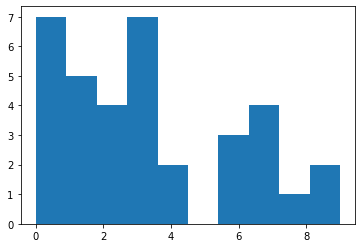

In [116]:
plt.hist(x.flatten())

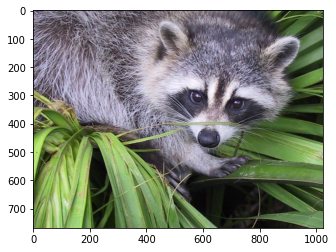

(array([206288., 213283., 299211., 348329., 373382., 315135., 277919.,
        189636., 114135.,  21978.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

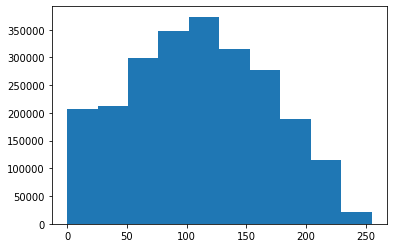

In [117]:
from scipy import misc
import imageio
f = misc.face().copy()
g = f.copy()
imageio.imsave('face.png', f) # uses the Image module (PIL)
plt.imshow(f); plt.show()
plt.hist(f.flatten())

In [118]:
# les pixels de l'image sont en entiers
f.dtype

dtype('uint8')

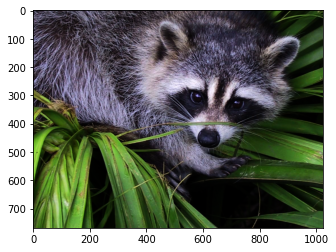

In [119]:
# quand la matrice est convertie en flottant, 
# l'intervalle des valeurs des pixels est entre 0 et 1 ( et non pas entre 0 et 255)
plt.imshow(((f / 255)**1.8)); plt.show()

In [120]:
f[f < 128] = 0

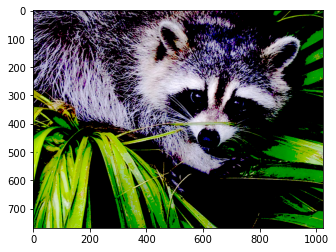

In [121]:
plt.imshow(f); plt.show()

In [122]:
g.mean(), np.max(g),  np.min(g), np.median(g.flatten())

(110.16274388631184, 255, 0, 109.0)

In [123]:
x = np.linspace(0, 10, 200)

In [124]:
y = np.sin(x)


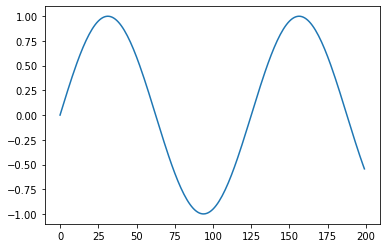

In [125]:
plt.plot(y)

In [13]:
K = 1000
x = np.random.normal(size=(K,K))
tx = torch.tensor(x)
# sur cpu ce calcul prend ~1ms 
%timeit (x*x)

791 µs ± 193 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%timeit (tx*tx)

713 µs ± 20.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


temps de calcul : $ t_{gpu} = t_{cpu} / 10$


In [16]:
# pour cela => Runtime / change runtime 
tx = tx.cuda()
%timeit (tx*tx)

94.1 µs ± 22.2 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


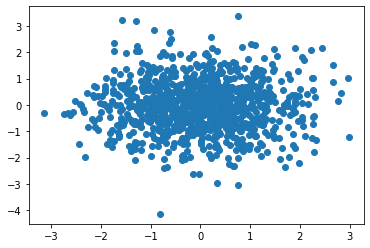

In [108]:
z = np.random.normal(0, 1, size=(1000, 2))
zx, zy = z[:,0], z[:,1]
plt.scatter(zx, zy)

In [101]:
# calcul symbolique avec sympy
x,y,z = sympy.symbols('x,y,z')

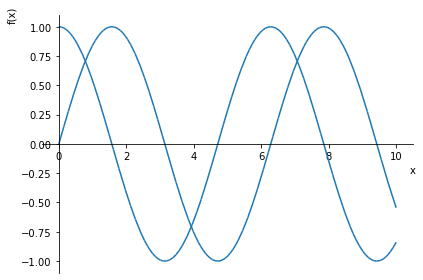

In [102]:
sympy.plot(sympy.sin(x), sympy.diff(sympy.sin(x), x), (x, 0,10))